In [31]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
kt=np.array([i/100 for i in range(1,100)])
kt_true=np.array([-math.log(1-_kt) for _kt in kt])

kt_approximate_2terms=[ i + (i**2)/2 for i in kt]
kt_approximate_3terms=[ i + (i**2)/2 + (i**3)/3 for i in kt]
kt_approximate_4terms=[ i + (i**2)/2 + (i**3)/3 + (i**4)/4 for i in kt]
kt_approximate_10terms=[ sum([ (_kt**i)/i for i in range(1,11) ]) for _kt in kt]


rd= abs(kt_true-kt)/kt_true
rd2=abs(kt_true-kt_approximate_2terms)/kt_true
rd3=abs(kt_true-kt_approximate_3terms)/kt_true
rd4=abs(kt_true-kt_approximate_4terms)/kt_true
rd10=abs(kt_true-kt_approximate_10terms)/kt_true

Text(0, 0.5, '$Relative Diffrence \\:( \\sum_{i=1}^{n} \\frac{kt^{i}}{i}, -ln(1-kt) \\: )$ ')

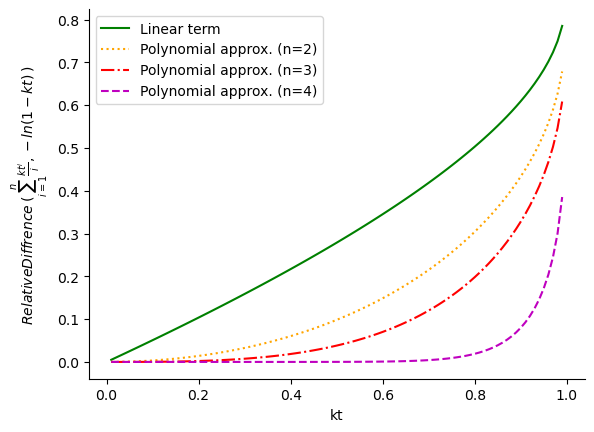

In [5]:
plt.plot(kt,rd, label="Linear term",c='g')
plt.plot(kt,rd2,label="Polynomial approx. (n=2)",ls=':',c='orange')
plt.plot(kt,rd3,label="Polynomial approx. (n=3)",ls="-.",c="red")
plt.plot(kt,rd10,label="Polynomial approx. (n=4)",ls="--",c='m')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.xlabel("kt")
# plt.ylabel(r"$Relative Diffrence ( ∑kt^{i}/i, ln(1-kt))$")
plt.ylabel(r'$Relative Diffrence \:( \sum_{i=1}^{n} \frac{kt^{i}}{i}, -ln(1-kt) \: )$ ')

In [6]:
kt=0.3
print(kt,-math.log(1-kt), (kt +math.log(1-kt))/kt)

0.3 0.35667494393873245 -0.18891647979577486


In [10]:
kt=0.3
1-math.exp(-kt), math.log(1 - 0.2591817793182821)

(0.2591817793182821, -0.3)

In [11]:
kt=np.array([i/100 for i in range(1,100)])
_kt=np.array([-math.log(1-i) for i in kt])

# plt.scatter(kt, (kt-_kt)/kt )
    

In [21]:
k=0.03
t=7
kt=k*t
x=1-math.exp(-kt)
print(k, x/t , sum([(x**i)/i for i in range(1,3)])/t, sum([(x**i)/i for i in range(1,4)])/t, sum([(x**i)/i for i in range(1,11)])/t)

0.03 0.02705939343283042 0.02962213113816489 0.02994574640138926 0.029999999822971576


In [42]:
def getestimation(k,t):
    kt=k*t
    x=1-math.exp(-kt)
    return(k,t, x/t , sum([(x**i)/i for i in range(1,3)])/t, sum([(x**i)/i for i in range(1,4)])/t, sum([(x**i)/i for i in range(1,11)])/t)

In [43]:
kvals=np.array([i/100 for i in range(1,100)])
t=list(range(1,11))
kestimated=np.array([[getestimation(_k,_t) for _t in t] for _k in kvals])

In [45]:
res=pd.DataFrame(kestimated.ravel().reshape(990,6))
res.columns=['k','t','1term','2term','3term','10term']
res.head()

,k,t,1term,2term,3term,10term
0,0.01,1.0,0.009950,0.010000,0.01,0.01
1,0.01,2.0,0.009901,0.009999,0.01,0.01
2,0.01,3.0,0.009851,0.009997,0.01,0.01
3,0.01,4.0,0.009803,0.009995,0.01,0.01
4,0.01,5.0,0.009754,0.009992,0.01,0.01


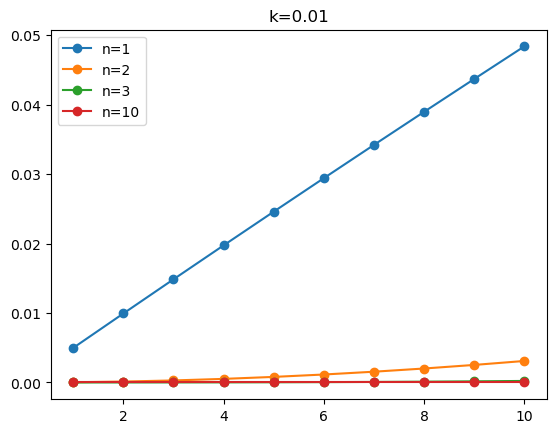

In [62]:
k=0.01
temp=res[res.k==k]
plt.plot(t,(temp.k-temp['1term'])/temp.k,marker='o',label=f"n=1")
plt.plot(t,(temp.k-temp['2term'])/temp.k,marker='o',label=f"n=2")
plt.plot(t,(temp.k-temp['3term'])/temp.k,marker='o',label=f"n=3")
plt.plot(t,(temp.k-temp['10term'])/temp.k,marker='o',label=f"n=10")
plt.title(f"k={k}")
plt.legend()

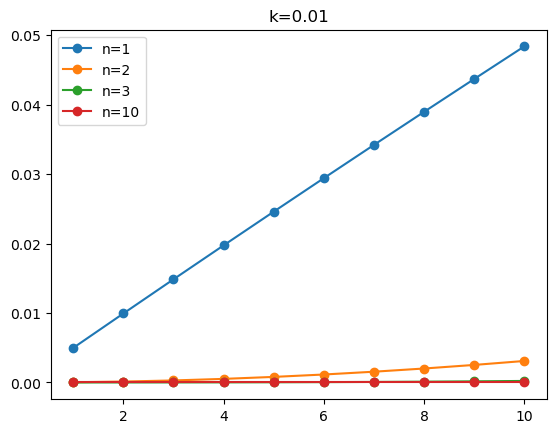

In [63]:
def getestimation(k,t):
    kt=k*t
    x=1-math.exp(-kt)
    return(k,t, x/t , sum([(x**i)/i for i in range(1,3)])/t, sum([(x**i)/i for i in range(1,4)])/t, sum([(x**i)/i for i in range(1,11)])/t)


kvals=np.array([i/100 for i in range(1,100)])
t=list(range(1,11))
kestimated=np.array([[getestimation(_k,_t) for _t in t] for _k in kvals])


k=0.01
temp=res[res.k==k]
plt.plot(t,(temp.k-temp['1term'])/temp.k,marker='o',label=f"n=1")
plt.plot(t,(temp.k-temp['2term'])/temp.k,marker='o',label=f"n=2")
plt.plot(t,(temp.k-temp['3term'])/temp.k,marker='o',label=f"n=3")
plt.plot(t,(temp.k-temp['10term'])/temp.k,marker='o',label=f"n=10")
plt.title(f"k={k}")
plt.legend()
